In [8]:
import matplotlib.pyplot as plt
import os
height = 14
width = height*0.6
plt.rcParams["figure.figsize"] = (height,width)
import numpy as np
# plt.style.use('seaborn-muted')


hierarchical = False

Dataset = "CIFAR10/"
# Dataset = "CIFAR100/"
# Dataset = "CIFAR100/hierarchical/"
# hierarchical = True
# Dataset = "MNIST/"

# model = "ResNet18"
model = "BranchedResNet18"
# model = "BranchedDenseNet18"


figure_directory = "../trained-models/"+model+"/"+Dataset

sub = ''
# sub = "single-branch-figures/"
# sub = "second-branch-figures/"
# sub = "single-second-branch-figures/"
# sub = "third-branch-figures/"
# sub = "single-third-branch-figures/"
sub = "pretrained/"
# sub = "finetuned/"

sub_directory = 'figures/'+sub

try:
    os.mkdir(figure_directory + sub_directory)
    print('Figure Folder Created..')
except FileExistsError:
    print('Figure Folder Exists..')
    
save_directory = figure_directory + sub_directory

if hierarchical:
    probe_dir = "/class-separation/hierarchical/"
else:
    probe_dir = "/class-separation/"

def load(directory,name,runs):
    run = 0
    values = np.load(directory+name+"-"+str(run)+".pth.npy")
    for run in range(run+1,runs):
        value = np.load(directory+name+"-"+str(run)+".pth.npy")
        values = np.vstack((values,value))
        
    print(values[2,:])
        
    means = np.mean(values,axis=0)
    stds = np.std(values,axis=0)
    
    return means,stds  


single_branch_weights = ['020']
single_means = list()
single_stds = list()
single_branches = list()
for weighting in single_branch_weights: 
    directory = figure_directory+"w"+weighting+probe_dir
    mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
    branch_weights = np.load(figure_directory+"w"+weighting+"/metrics/branch-weights-"+model+".npy")
    single_branches.append(branch_weights)
    single_means.append(mean)
    single_stds.append(std)
for i in range(len(single_branch_weights)):
    single_branch_weights[i] = single_branch_weights[i][0:1]+'.'+single_branch_weights[i][1:]


# pretrained_weights = ['02','04','06','08']
# pretrained_means = list()
# pretrained_stds = list()
# pretrained_branches = list()
# for weighting in pretrained_weights: 
#     directory = figure_directory+"ptr_wb1"+weighting+"_a"+probe_dir
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     branch_weights = np.load(figure_directory+"ptr_wb1"+weighting+"_a"+"/metrics/branch-weights-"+Model+".npy")
#     pretrained_branches.append(branch_weights)
#     pretrained_means.append(mean)
#     pretrained_stds.append(std)
# for i in range(len(pretrained_weights)):
#     pretrained_weights[i] = pretrained_weights[i][0:1]+'.'+pretrained_weights[i][1:]+'0'
    
# finetuned_weights = ['02','04','06','08']
# finetuned_means = list()
# finetuned_stds = list()
# finetuned_branches = list()
# for weighting in finetuned_weights: 
#     directory = "../trained-models/"+model+"/"+Dataset+"ft_wb1"+weighting+probe_dir
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     branch_weights = np.load("../trained-models/"+model+"/"+Dataset+"ft_wb1"+weighting+"/metrics/pretrained-branch-weights-"+model+".npy")
#     finetuned_branches.append(branch_weights)
#     finetuned_means.append(mean)
#     finetuned_stds.append(std)

# hierarchical_weights = ['02','04','06','08']
# hierarchical_means = list()
# hierarchical_stds = list()
# hierarchical_branches = list()
# for weighting in hierarchical_weights: 
#     directory = figure_directory+"hierarchical/hwb1"+weighting+probe_dir
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     branch_weights = np.load(figure_directory+"hierarchical/hwb1"+weighting+"/metrics/branch-weights-"+Model+".npy")
#     hierarchical_branches.append(branch_weights)
#     hierarchical_means.append(mean)
#     hierarchical_stds.append(std)
# for i in range(len(hierarchical_weights)):
#     hierarchical_weights[i] = hierarchical_weights[i][0:1]+'.'+hierarchical_weights[i][1:]+'0'

multi_branch_weights = ['wb102-b202-b302']
multi_means = list()
multi_stds = list()
multi_branches = list()
for weighting in multi_branch_weights: 
    directory = figure_directory+weighting+probe_dir
    branch_weights = np.load(figure_directory+weighting+"/metrics/branch-weights-"+model+".npy")
    multi_branches.append(branch_weights)
    mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
    multi_means.append(mean)
    multi_stds.append(std)
    

third_branch_weights = ['02']
third_means = list()
third_stds = list()
third_branches = list()
for weighting in third_branch_weights: 
    directory = figure_directory+"wb102-b3"+weighting+probe_dir
    branch_weights = np.load(figure_directory+"wb102-b3"+weighting+"/metrics/branch-weights-"+model+".npy")
    third_branches.append(branch_weights)
    mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
    third_means.append(mean)
    third_stds.append(std)

second_branch_weights = ['02']
second_means = list()
second_stds = list()
second_branches = list()
for weighting in second_branch_weights: 
    directory = figure_directory+"wb102-b2"+weighting+probe_dir
    branch_weights = np.load(figure_directory+"wb102-b2"+weighting+"/metrics/branch-weights-"+model+".npy")
    second_branches.append(branch_weights)
    mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
    second_means.append(mean)
    second_stds.append(std)

    
# for i in range(len(weights)):
#     weights[i] = weights[i][0:1]+'.'+weights[i][1:]+'0'

# run = "MNIST-SGDR"
# run = "CIFAR100-SGDR"
# run = "../CIFAR100-SGDR"
run='300_epoch'
# run='200-epoch'
    
unbranched_mean,unbranched_std = load("../trained-models/ResNet18/"+Dataset+"/"+ run+probe_dir,"best-ResNet18-CIFAR-10",3)
# unbranched_mean,unbranched_std = load("../trained-models/DenseNet18/"+Dataset+"/"+ run+probe_dir,"best-DenseNet18-CIFAR-10",3)

Figure Folder Exists..
[0.04991087 0.04532793 0.04384314 0.04348088 0.06749008 0.05891249
 0.06247278 0.05224013 0.06020275 0.06252367 0.06838012 0.0801415
 0.13420558 0.23345439 0.47167557 0.5530501  0.80649845 0.92166567]
[0.04965076 0.04498934 0.04419796 0.04463851 0.06046498 0.05310716
 0.05406251 0.05611247 0.14084399 0.10360671 0.13197783 0.18906022
 0.59182579 0.57200052 0.77666953 0.70242545 0.84045988 0.88306348]
[0.04882342 0.04445728 0.04534482 0.04656057 0.06697509 0.05654147
 0.05685063 0.05097331 0.05940615 0.06605736 0.09147341 0.14146725
 0.51878996 0.54956719 0.73695831 0.70566721 0.86222607 0.92339978]
[0.04978888 0.04428966 0.0444111  0.04325033 0.06263937 0.05223514
 0.05648008 0.05965658 0.16849202 0.1132869  0.11709638 0.12060284
 0.17968462 0.25983106 0.52020373 0.58107105 0.79376326 0.91202289]
[0.02987233 0.01950455 0.0181117  0.01434256 0.02373413 0.02158063
 0.02595947 0.02215283 0.02921479 0.0315139  0.03739598 0.0467964
 0.09558793 0.19120711 0.41231294 0.5

In [2]:
def get_values(values):
    return(np.arange(1,values.shape[0]+1))

def plot_accuracies(accuracies,errors,name,color,branched=False):

    layers = get_values(accuracies)
    if branched == True:
        plt.plot(layers,accuracies,'-.', label = name, color = color)
        plt.fill_between(layers, accuracies-errors, accuracies+errors,alpha=0.4, color = color)
    if branched == False:
        plt.plot(layers,accuracies, label = name, color = color)
        plt.fill_between(layers, accuracies-errors, accuracies+errors,alpha=0.4, color = color)
        
        
def get_label(branch_weights):
    string = "("
    for weight in branch_weights:
        weight = np.round(weight,decimals=3)
        string = string + str(weight) + " : "
    string = string[:-3]+')'
    return(string)

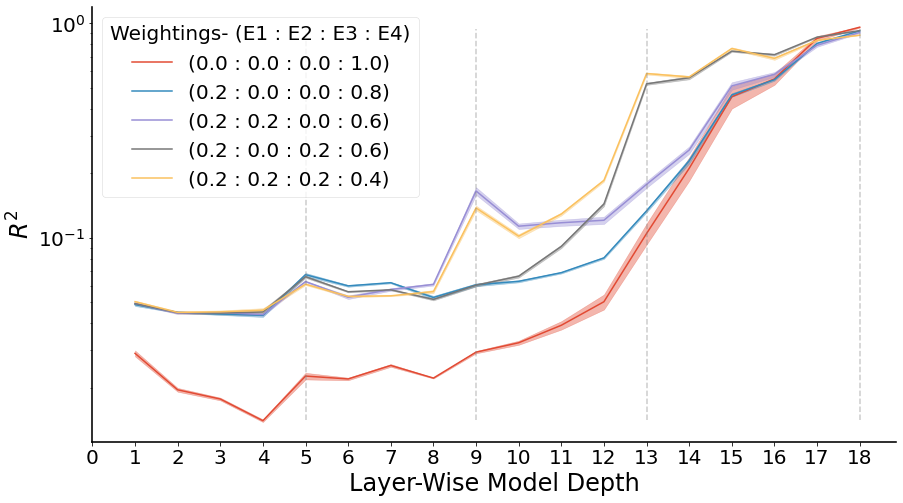

In [33]:

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()

color = 0

plot_accuracies(unbranched_mean,unbranched_std,'(0.0 : 0.0 : 0.0 : 1.0)',('C'+str(color)))
color=color+1

for model in range(len(single_branch_weights)):
    plot_accuracies(single_means[model],single_stds[model],get_label(single_branches[model]),('C'+str(color)))
    color=color+1

for model in range(len(second_branch_weights)):
    plot_accuracies(second_means[model],second_stds[model],get_label(second_branches[model]),('C'+str(color)))
    color=color+1
    
for model in range(len(third_branch_weights)):
    plot_accuracies(third_means[model],third_stds[model],get_label(third_branches[model]),('C'+str(color)))
    color=color+1
    
for model in range(len(multi_branch_weights)):
    plot_accuracies(multi_means[model],multi_stds[model],get_label(multi_branches[model]),('C'+str(color)))
    color=color+1
    
# for model in range(len(pretrained_weights)):
#     plot_accuracies(pretrained_means[model],pretrained_stds[model],('Pretrained: ' + get_label(pretrained_branches[model])),('C'+str(color)))
#     color=color+1
    
# for model in range(len(finetuned_weights)):
#     plot_accuracies(finetuned_means[model],finetuned_stds[model],('Finetuned: ' + get_label(finetuned_branches[model])),('C'+str(color)))
#     color=color+1
    
# for model in range(len(hierarchical_weights)):
#     plot_accuracies(hierarchical_means[model],hierarchical_stds[model],('Hierarchical- ' + get_label(single_branches[model])),('C'+str(color)))
#     color=color+1

height = 8
width = height*1.8
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams["figure.figsize"] = (width,height)
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = "black"
plt.rcParams['axes.linewidth'] = 1.6
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.size'] = 20

plt.xticks(np.arange(0,unbranched_mean.shape[0]+1))
    
# plt.title('Class-separation with layer-wise model depth')
plt.xlabel("Layer-Wise Model Depth")
plt.ylabel("$R^2$")


plt.axvline(x=5,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=9,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=13,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=18,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')

plt.legend(title='Weightings- (E1 : E2 : E3 : E4)',loc=2)
# plt.savefig(save_directory+'class-separation.pdf', bbox_inches = 'tight')
plt.yscale('log')
plt.savefig('log-class-separation.pdf', bbox_inches = 'tight')
plt.show()

NameError: name 'multi_branch_weights' is not defined

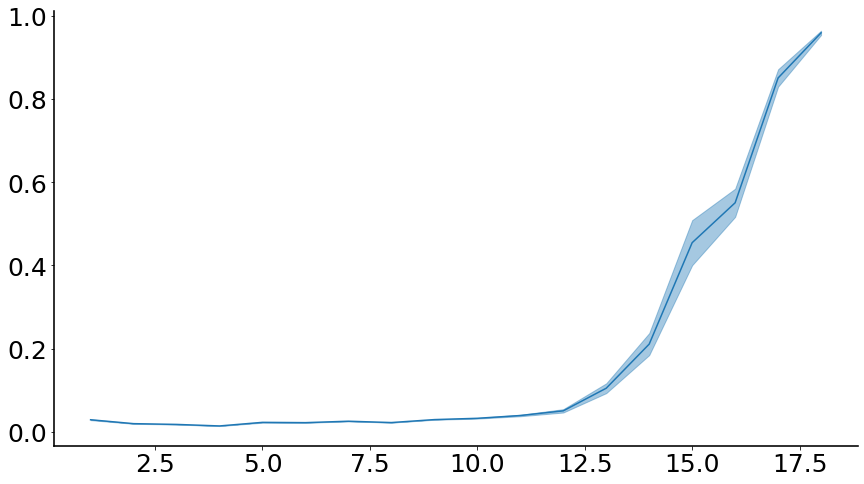

In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots()


color = 0

plot_accuracies(unbranched_mean,unbranched_std,'(0.0 : 0.0 : 0.0 : 1.0)',('C'+str(color)))
color=color+1

# for model in range(len(single_branch_weights)):
#     plot_accuracies(single_means[model],single_stds[model],get_label(single_branches[model]),('C'+str(color)))
#     color=color+1

# for model in range(len(second_branch_weights)):
#     plot_accuracies(second_means[model],second_stds[model],get_label(second_branches[model]),('C'+str(color)))
#     color=color+1
    
# for model in range(len(third_branch_weights)):
#     plot_accuracies(third_means[model],third_stds[model],get_label(third_branches[model]),('C'+str(color)))
#     color=color+1
    
for model in range(len(multi_branch_weights)):
    plot_accuracies(multi_means[model],multi_stds[model],get_label(multi_branches[model]),('C'+str(color)))
    color=color+1
    
# for model in range(len(pretrained_weights)):
#     plot_accuracies(pretrained_means[model],pretrained_stds[model],('Pretrained: ' + get_label(pretrained_branches[model])),('C'+str(color)))
#     color=color+1
    
# for model in range(len(finetuned_weights)):
#     plot_accuracies(finetuned_means[model],finetuned_stds[model],('Finetuned: ' + get_label(finetuned_branches[model])),('C'+str(color)))
#     color=color+1
    
# for model in range(len(hierarchical_weights)):
#     plot_accuracies(hierarchical_means[model],hierarchical_stds[model],('Hierarchical- ' + get_label(single_branches[model])),('C'+str(color)))
#     color=color+1
    
plt.title('Class-separation with layer-wise model depth',size=18)
plt.xlabel("Layer-wise Model Depth",size=15)
plt.ylabel("$R^2$",size=15)
plt.legend(title='Weightings- (Exit 1 : Exit 2 : Exit 3 : Final Exit)',loc=2)
plt.xticks(np.arange(0,single_means[0].shape[0]+1))
plt.axvline(x=5,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=9,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=13,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=18,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')

axins = inset_axes(ax, width=width/1.2, height=height/2.5, bbox_to_anchor=(1.06,0.05), loc=3, bbox_transform=ax.transAxes)

color = 0

plot_accuracies(unbranched_mean,unbranched_std,'(0.0 : 0.0 : 0.0 : 1.0)',('C'+str(color)))
color=color+1

# for model in range(len(single_branch_weights)):
#     plot_accuracies(single_means[model],single_stds[model],get_label(single_branches[model]),('C'+str(color)))
#     color=color+1

# for model in range(len(second_branch_weights)):
#     plot_accuracies(second_means[model],second_stds[model],get_label(second_branches[model]),('C'+str(color)))
#     color=color+1
    
# for model in range(len(third_branch_weights)):
#     plot_accuracies(third_means[model],third_stds[model],get_label(third_branches[model]),('C'+str(color)))
#     color=color+1
    
for model in range(len(multi_branch_weights)):
    plot_accuracies(multi_means[model],multi_stds[model],get_label(multi_branches[model]),('C'+str(color)))
    color=color+1
    
# for model in range(len(pretrained_weights)):
#     plot_accuracies(pretrained_means[model],pretrained_stds[model],('Pretrained: ' + get_label(pretrained_branches[model])),('C'+str(color)))
#     color=color+1
    
# for model in range(len(finetuned_weights)):
#     plot_accuracies(finetuned_means[model],finetuned_stds[model],('Finetuned: ' + get_label(finetuned_branches[model])),('C'+str(color)))
#     color=color+1
    
# for model in range(len(hierarchical_weights)):
#     plot_accuracies(hierarchical_means[model],hierarchical_stds[model],('Hierarchical- ' + get_label(single_branches[model])),('C'+str(color)))
#     color=color+1
plt.xticks(np.arange(0,single_means[0].shape[0]+1))
plt.axvline(x=5,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=9,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=13,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=18,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')

# sub region of the original image
x1, x2, y1, y2 = 12,19,0.33,0.99
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.tick_params(axis = "x", which = "both", bottom = False, top = False)
axins.tick_params(axis = "y", which = "both", left = False, right = False)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
axins.legend(
)

plt.savefig(save_directory+'boxed-class-separation.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

run='300_epoch'

resnet18_mean,resnet18_std = load("../trained-models/ResNet18/"+Dataset+"/"+ run+probe_dir,"best-ResNet18-CIFAR-10",3)
resnet50_mean,resnet50_std = load("../trained-models/ResNet50/"+Dataset+"/"+ run+probe_dir,"best-ResNet50-CIFAR-10",3)

fig, ax = plt.subplots()


color = 0

plot_accuracies(resnet18_mean,resnet18_std,'ResNet18',('C'+str(color)))
color=color+1
plot_accuracies(resnet50_mean,resnet50_mean,'ResNet50',('C'+str(color)))
color=color+1
    
plt.title('Class-separation with layer-wise model depth')
plt.xlabel("Layer-wise Model Depth")
plt.ylabel("$R^2$")
plt.legend(title='Weightings- (Exit 1 : Exit 2 : Exit 3 : Final Exit)',loc=2)
plt.xticks(np.arange(0,resnet50_mean.shape[0]+1,))

# plt.axvline(x=5,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
# plt.axvline(x=9,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
# plt.axvline(x=13,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
# plt.axvline(x=18,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')

plt.savefig(save_directory+'Multi-model-class-separation.pdf', bbox_inches = 'tight')
plt.show()

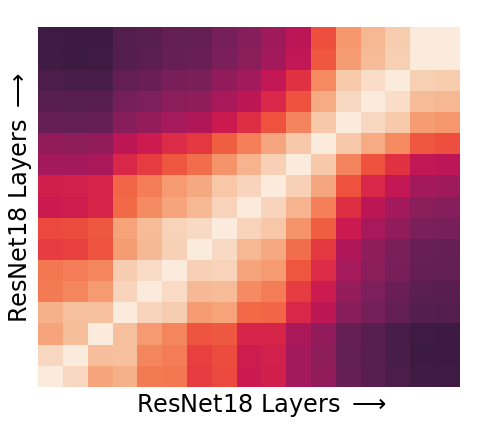

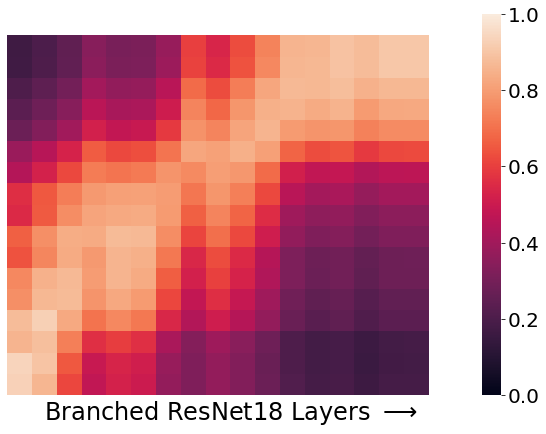

In [40]:
import seaborn as sns

avg_CKA = np.load('../trained-models/ResNet18/CIFAR10/cka-analysis/matrices/ResNet18-ResNet18.npy')

plt.rcParams['font.size'] = 20



plt.figure(figsize = (8,7))
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off
sns.heatmap(avg_CKA, vmin=0, vmax=1, cbar=False)
plt.ylim(1,avg_CKA.shape[1]+1)
plt.xlim(1,avg_CKA.shape[0]+1)
# plt.title("CKA metric")
plt.ylabel('ResNet18 Layers $\longrightarrow$')
plt.xlabel('ResNet18 Layers $\longrightarrow$')
plt.savefig('cka.pdf', bbox_inches = 'tight')
plt.show()

avg_CKA = np.load('../trained-models/ResNet18/CIFAR10/cka-analysis/matrices/ResNet18-BranchedResNet18 (0.2 : 0.2 : 0.2 : 0.4).npy')

plt.figure(figsize = (10,7))
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off
sns.heatmap(avg_CKA, vmin=0, vmax=1)
plt.ylim(1,avg_CKA.shape[1]+1)
plt.xlim(1,avg_CKA.shape[0]+1)
# plt.title("CKA metric")
plt.xlabel(r'Branched ResNet18 Layers $\longrightarrow$')
# plt.ylabel(save_name_a)
plt.savefig('cka-branched.pdf', bbox_inches = 'tight')
plt.show()